In [2]:
import scipy.io.wavfile as wav
import scipy.signal as ss
import numpy as np
import os
import matplotlib.pyplot as plt

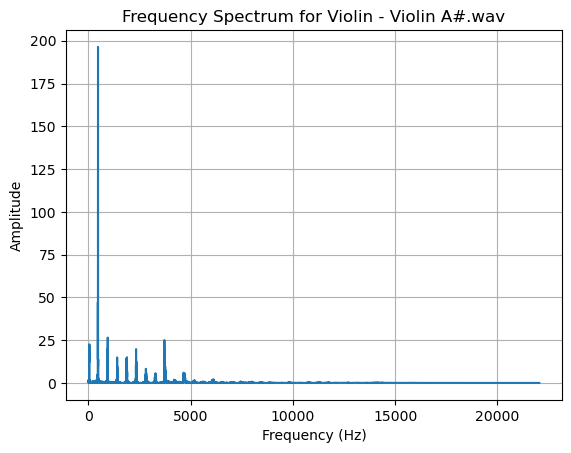

Peak frequency for Violin (Violin A#.wav): 468.0 Hz


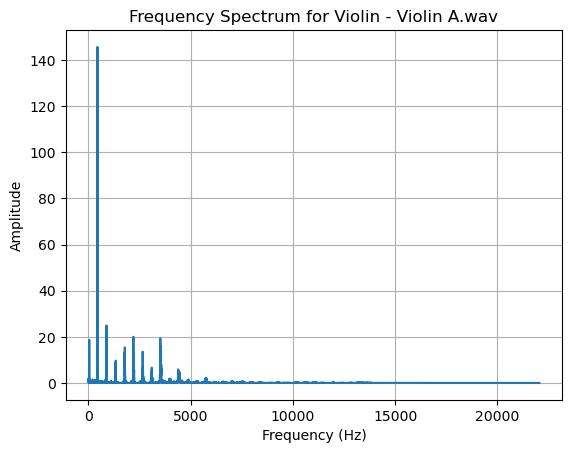

Peak frequency for Violin (Violin A.wav): 441.0 Hz


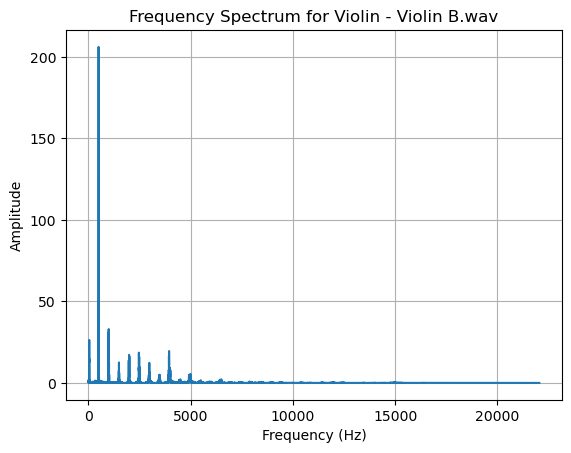

Peak frequency for Violin (Violin B.wav): 496.0 Hz


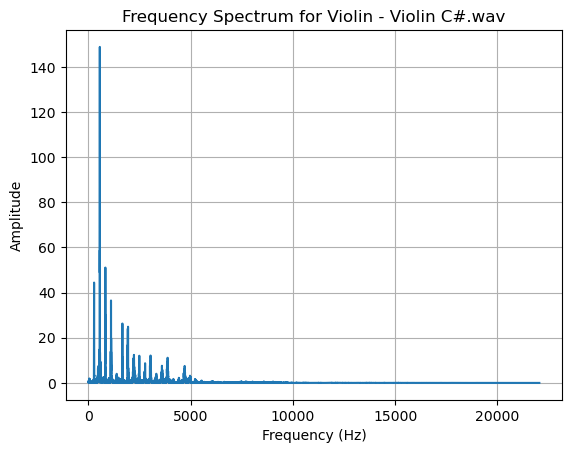

Peak frequency for Violin (Violin C#.wav): 556.0 Hz


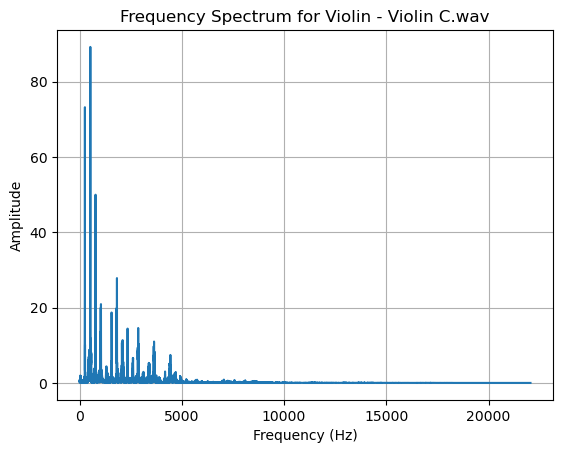

Peak frequency for Violin (Violin C.wav): 526.0 Hz


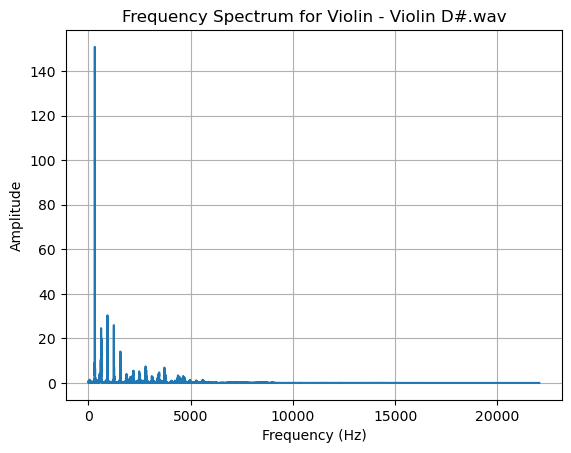

Peak frequency for Violin (Violin D#.wav): 312.0 Hz


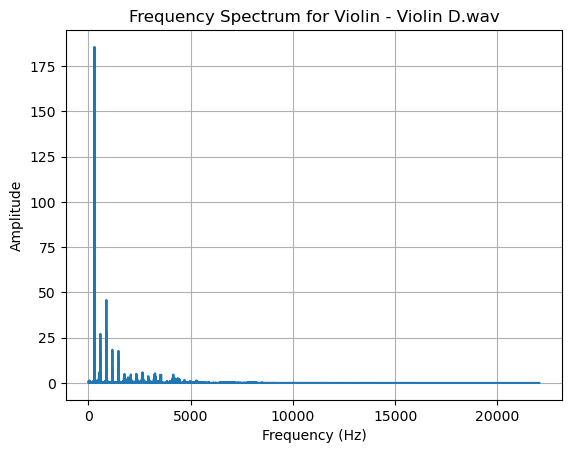

Peak frequency for Violin (Violin D.wav): 294.0 Hz


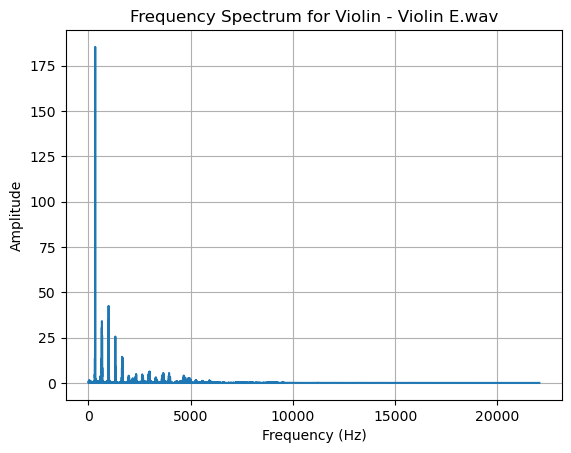

Peak frequency for Violin (Violin E.wav): 331.0 Hz


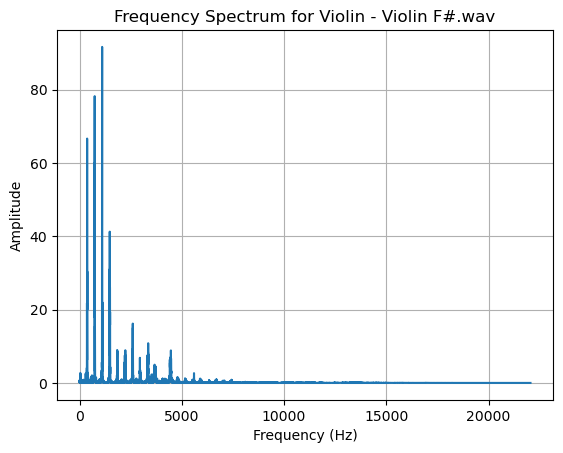

Peak frequency for Violin (Violin F#.wav): 1104.0 Hz


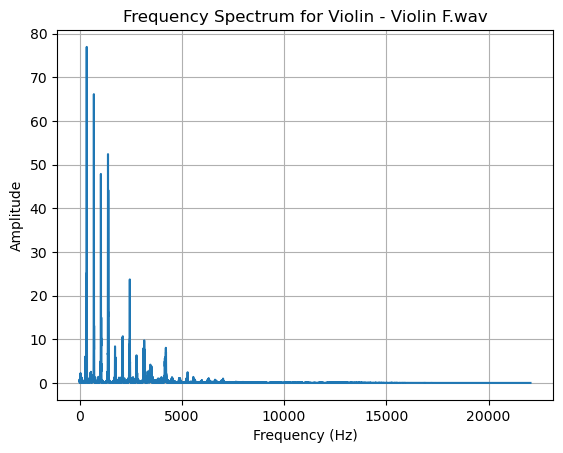

Peak frequency for Violin (Violin F.wav): 350.0 Hz


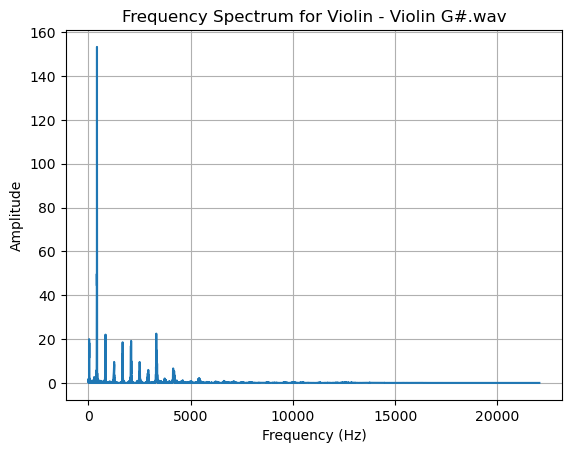

Peak frequency for Violin (Violin G#.wav): 417.0 Hz


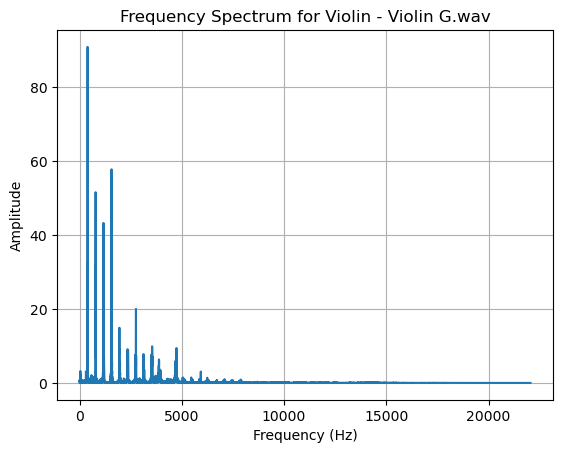

Peak frequency for Violin (Violin G.wav): 392.0 Hz
Processing complete for Violin!


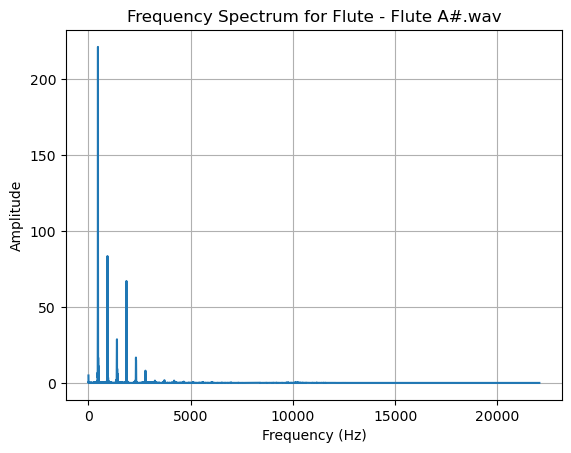

Peak frequency for Flute (Flute A#.wav): 465.0 Hz


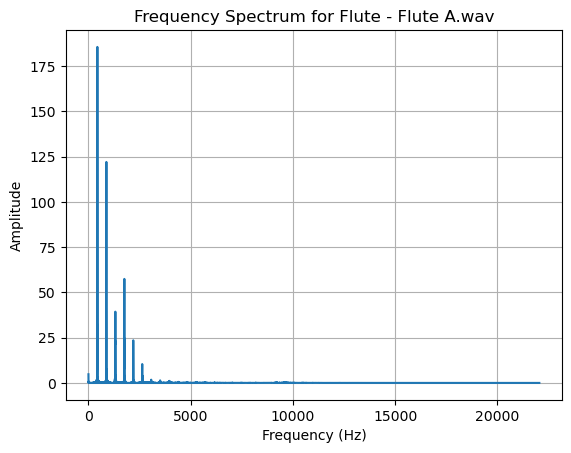

Peak frequency for Flute (Flute A.wav): 436.0 Hz


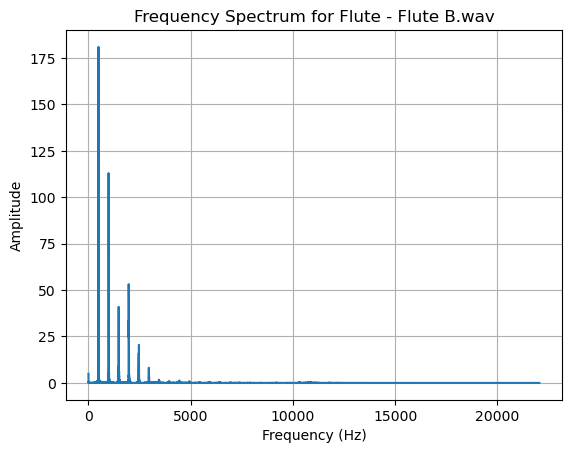

Peak frequency for Flute (Flute B.wav): 492.0 Hz


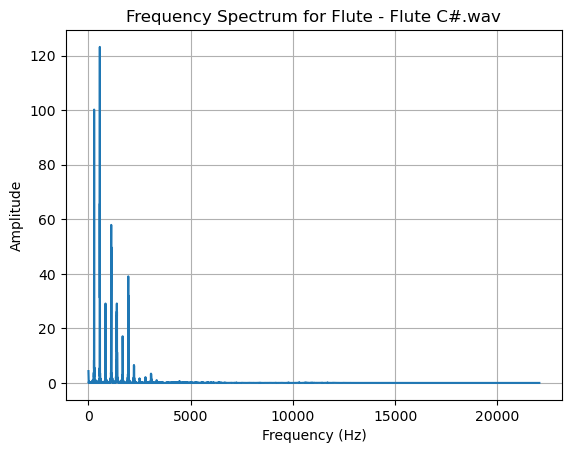

Peak frequency for Flute (Flute C#.wav): 556.0 Hz


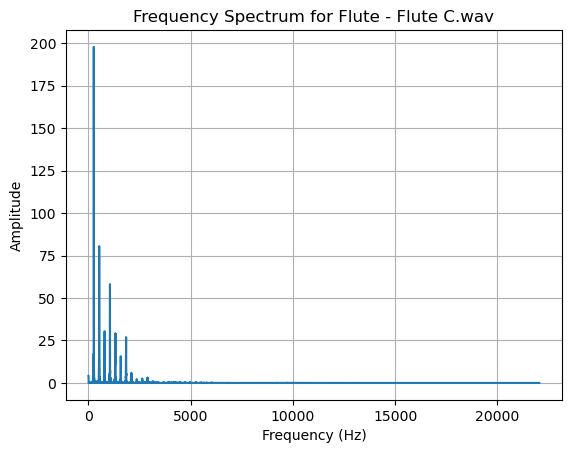

Peak frequency for Flute (Flute C.wav): 261.0 Hz


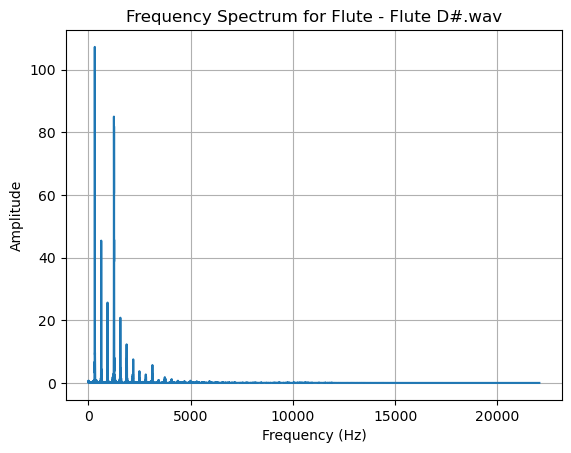

Peak frequency for Flute (Flute D#.wav): 310.0 Hz


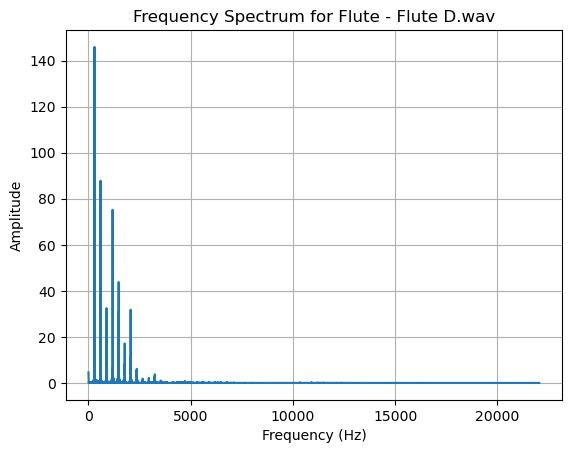

Peak frequency for Flute (Flute D.wav): 295.0 Hz


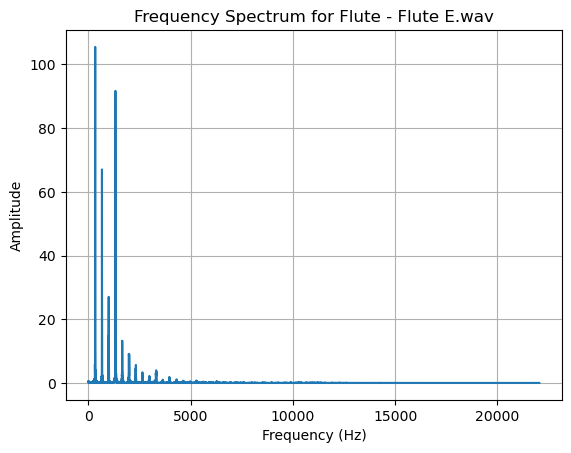

Peak frequency for Flute (Flute E.wav): 331.0 Hz


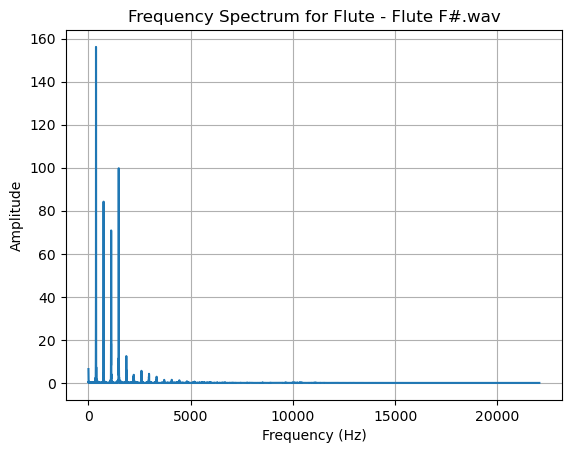

Peak frequency for Flute (Flute F#.wav): 370.0 Hz


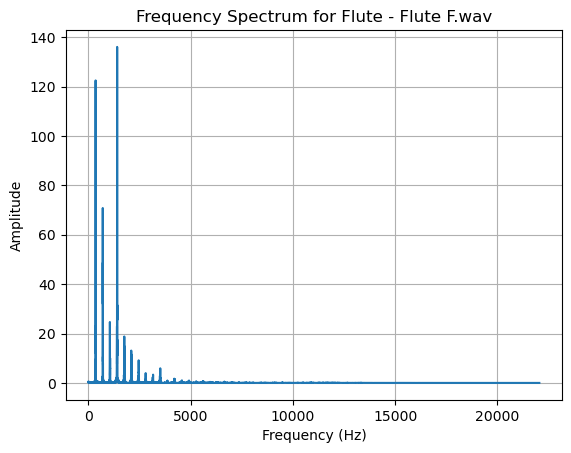

Peak frequency for Flute (Flute F.wav): 1404.0 Hz


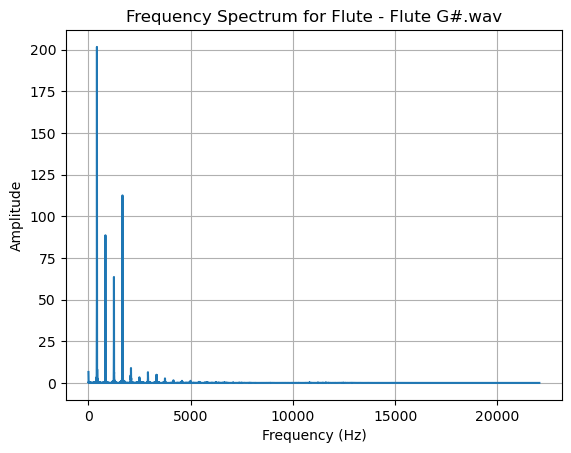

Peak frequency for Flute (Flute G#.wav): 415.0 Hz


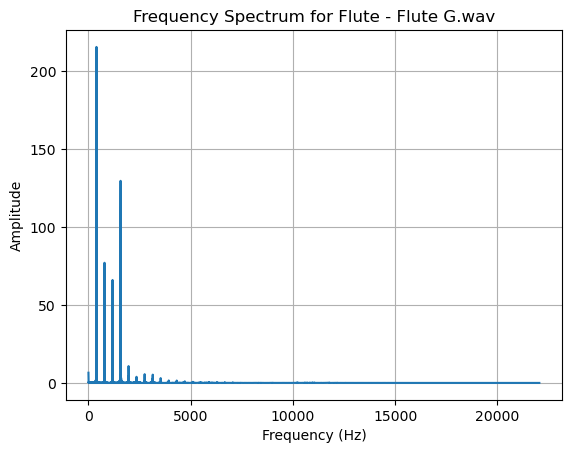

Peak frequency for Flute (Flute G.wav): 392.0 Hz
Processing complete for Flute!


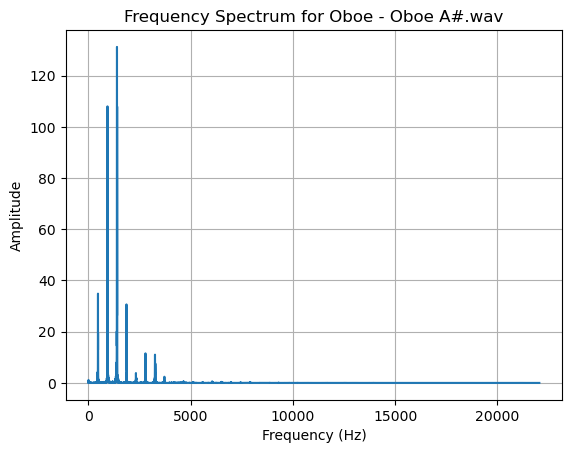

Peak frequency for Oboe (Oboe A#.wav): 1395.0 Hz


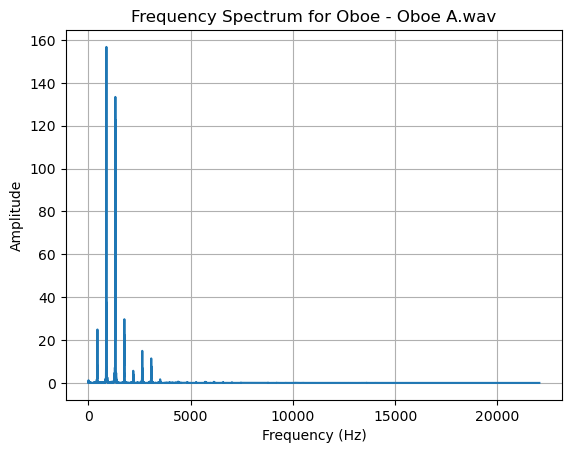

Peak frequency for Oboe (Oboe A.wav): 878.0 Hz


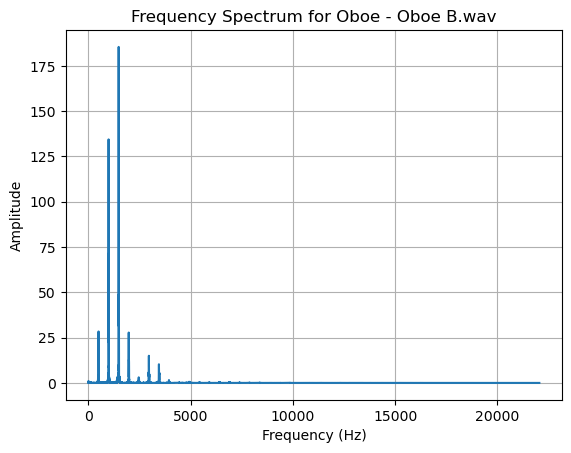

Peak frequency for Oboe (Oboe B.wav): 1478.0 Hz


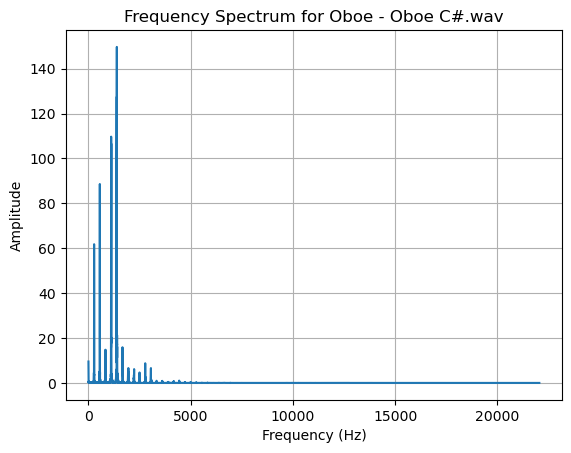

Peak frequency for Oboe (Oboe C#.wav): 1388.0 Hz


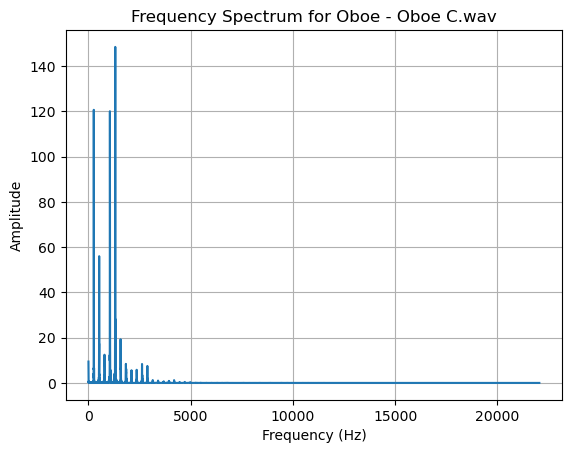

Peak frequency for Oboe (Oboe C.wav): 1312.0 Hz


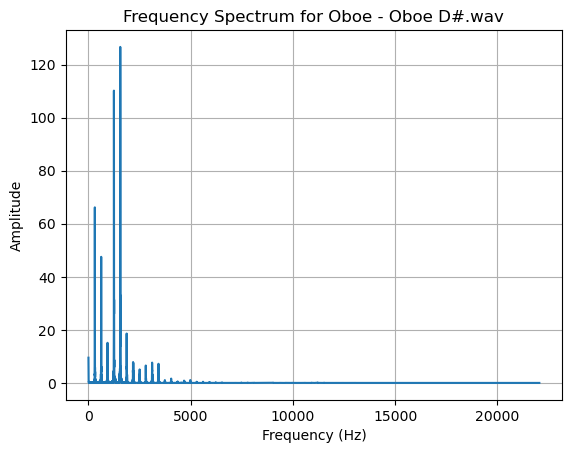

Peak frequency for Oboe (Oboe D#.wav): 1556.0 Hz


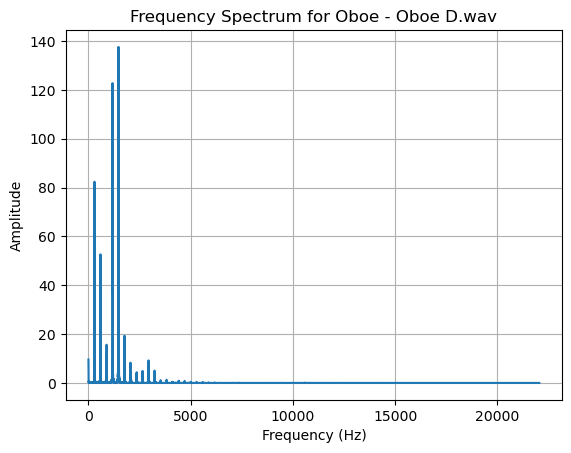

Peak frequency for Oboe (Oboe D.wav): 1468.0 Hz


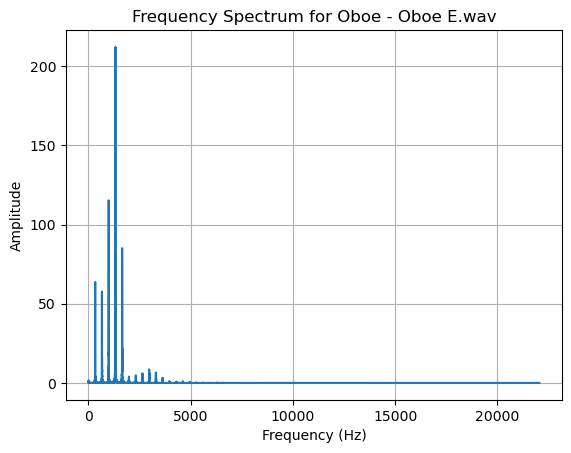

Peak frequency for Oboe (Oboe E.wav): 1319.0 Hz


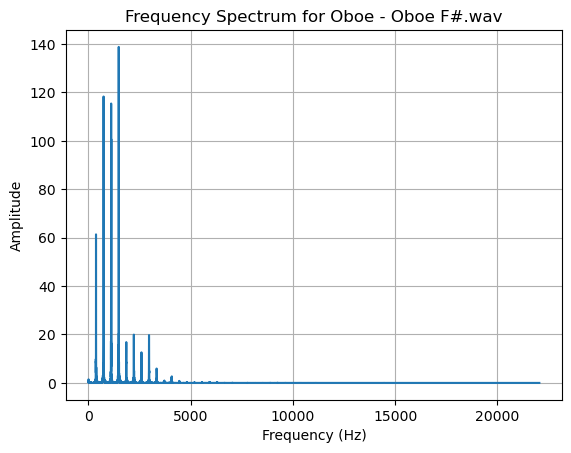

Peak frequency for Oboe (Oboe F#.wav): 1481.0 Hz


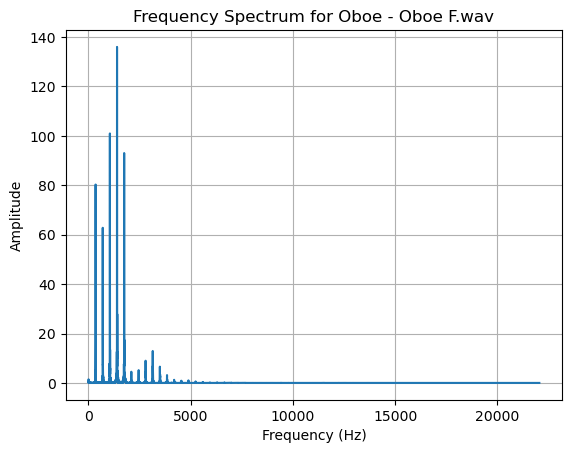

Peak frequency for Oboe (Oboe F.wav): 1398.0 Hz


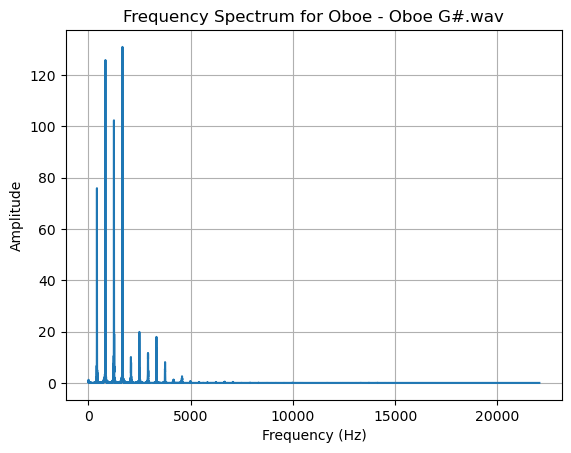

Peak frequency for Oboe (Oboe G#.wav): 1663.0 Hz


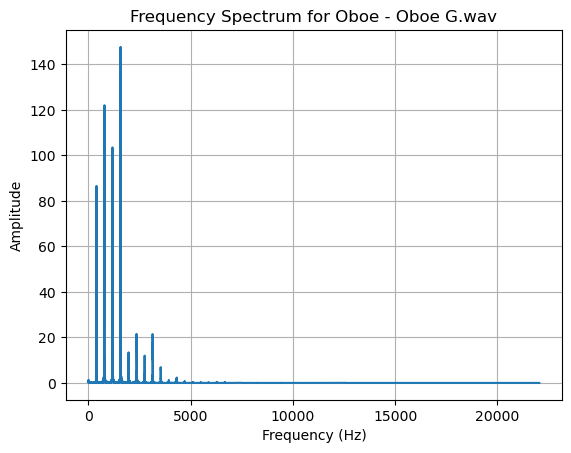

Peak frequency for Oboe (Oboe G.wav): 1570.0 Hz
Processing complete for Oboe!


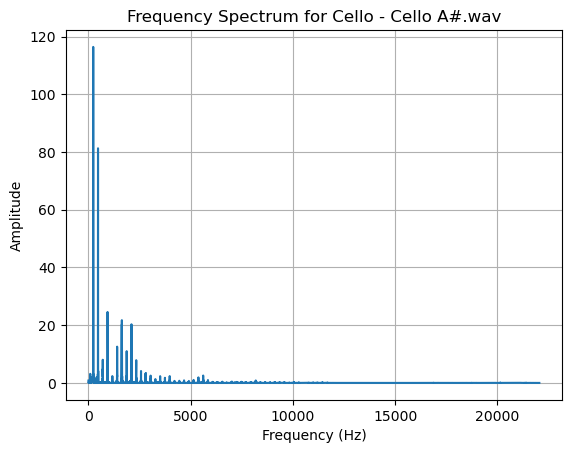

Peak frequency for Cello (Cello A#.wav): 234.0 Hz


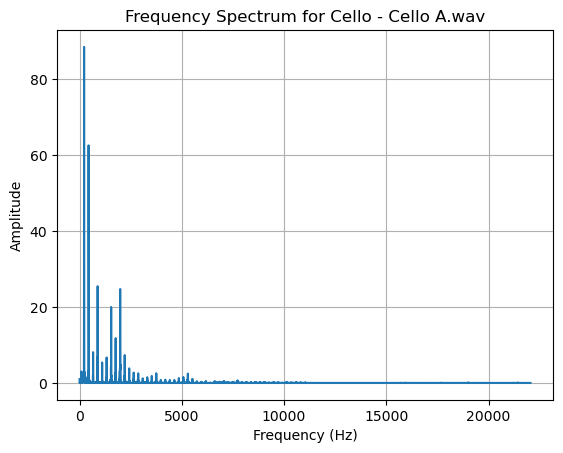

Peak frequency for Cello (Cello A.wav): 221.0 Hz


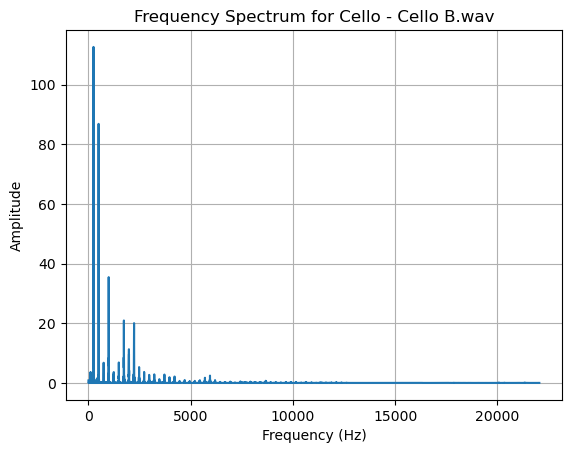

Peak frequency for Cello (Cello B.wav): 247.0 Hz


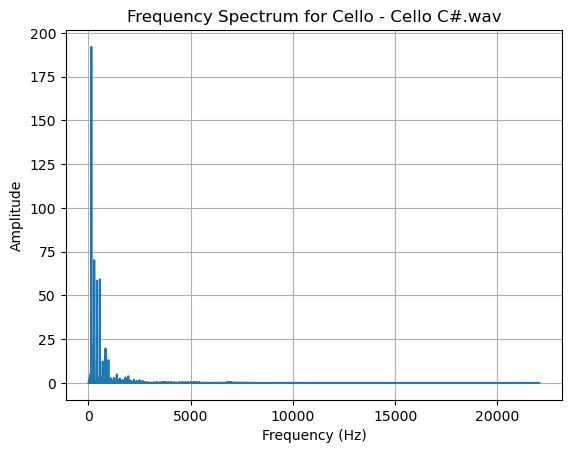

Peak frequency for Cello (Cello C#.wav): 140.0 Hz


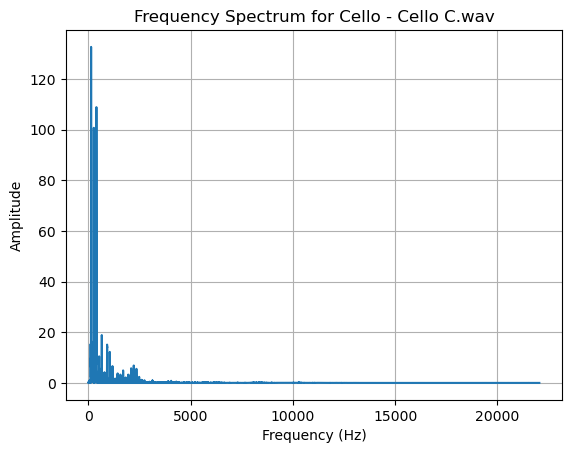

Peak frequency for Cello (Cello C.wav): 130.0 Hz


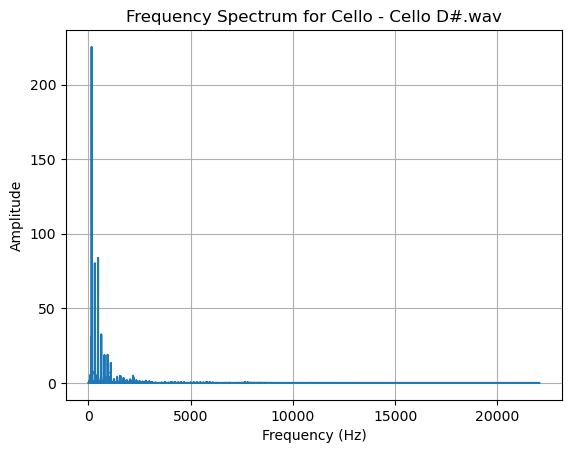

Peak frequency for Cello (Cello D#.wav): 156.0 Hz


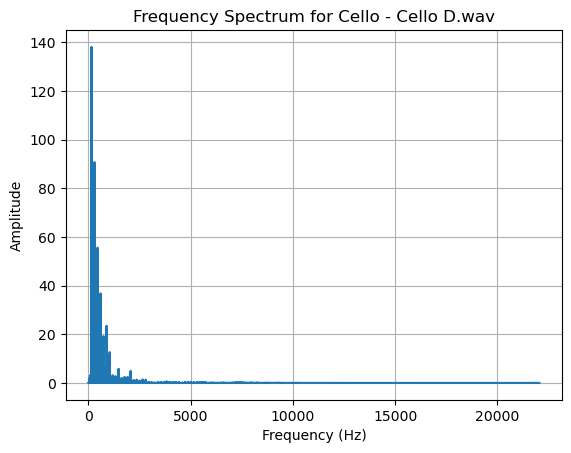

Peak frequency for Cello (Cello D.wav): 147.0 Hz


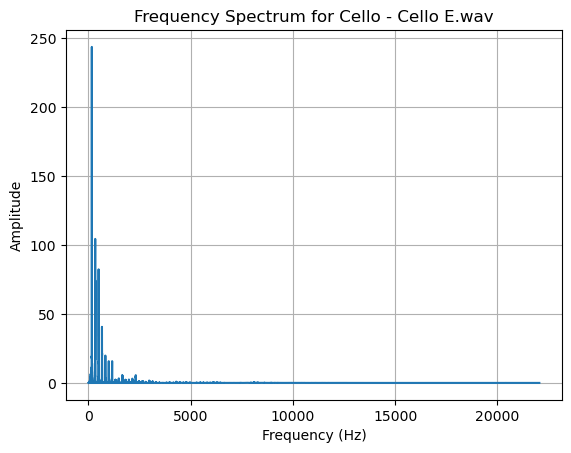

Peak frequency for Cello (Cello E.wav): 165.0 Hz


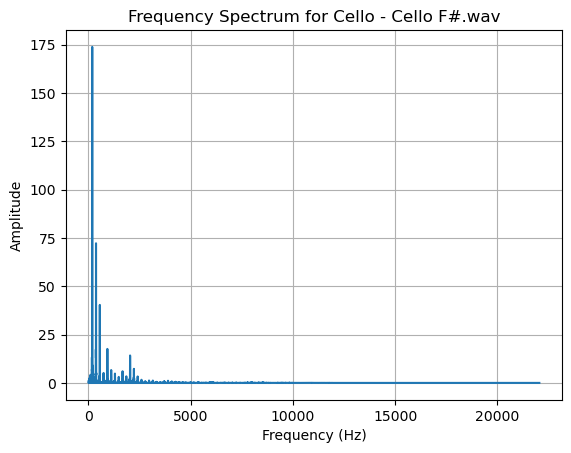

Peak frequency for Cello (Cello F#.wav): 185.0 Hz


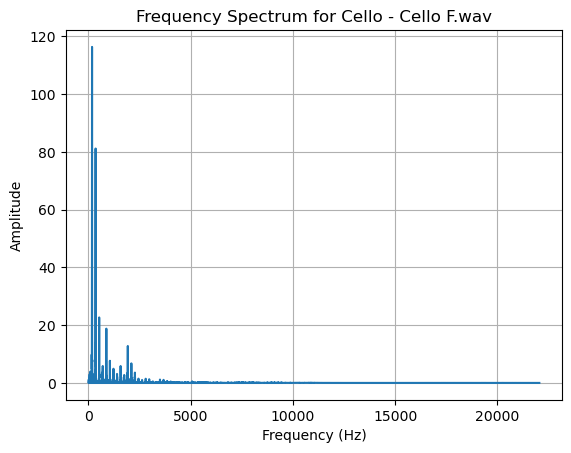

Peak frequency for Cello (Cello F.wav): 176.0 Hz


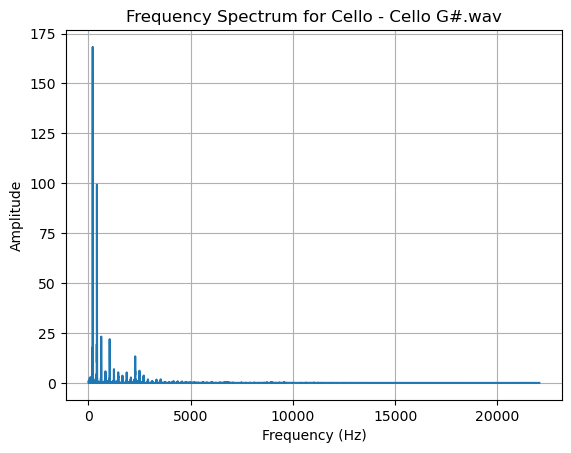

Peak frequency for Cello (Cello G#.wav): 209.0 Hz


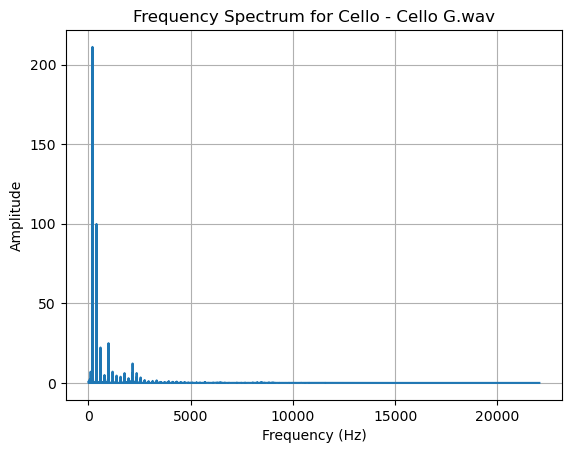

Peak frequency for Cello (Cello G.wav): 197.0 Hz
Processing complete for Cello!


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

# List of instruments
instruments = ['Violin', 'Flute', 'Oboe', 'Cello']

# Iterate over each instrument
for instrument in instruments:
    # Create the directory for the trimmed files if it doesn't exist
    os.makedirs(f'trimmed_{instrument.lower()}', exist_ok=True)
    
    # Process each file for the current instrument
    for file in os.listdir('sound_data'):
        if file.startswith(instrument):
            # Read the wav file
            sample_rate, data = wav.read(os.path.join('sound_data', file))
            
            # Trim to first 44100 samples (1 second of audio)
            trimmed_data = data[:, 0][:44100]  # If stereo, select first channel
            
            # Perform FFT on the trimmed data
            fft_data = np.fft.fft(trimmed_data)
            amplitude = np.abs(fft_data)
            n = len(trimmed_data)
            
            # Compute the frequencies and positive frequencies only
            frequencies = np.fft.fftfreq(n, 1/sample_rate)
            pos_freq = frequencies[:n//2]
            pos_amp = amplitude[:n//2]
            
            # Plot the frequency spectrum
            plt.plot(pos_freq, pos_amp)
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude')
            plt.title(f'Frequency Spectrum for {instrument} - {file}')
            plt.grid(True)
            plt.show()
            
            # Find the peak frequency
            central_index = np.argmax(pos_amp)
            max_freq = pos_freq[central_index]
            print(f'Peak frequency for {instrument} ({file}): {max_freq} Hz')

    # Print completion message for the instrument
    print(f'Processing complete for {instrument}!')
